In [57]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from sklearn.preprocessing import OneHotEncoder

In [5]:
mnist = np.load("../datasets/mnist_train_small.npy")

In [6]:
X, y = mnist[:, 1:], mnist[:, 0]

In [7]:
ohe = OneHotEncoder(categories="auto")

In [8]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [10]:
y.shape

(19999,)

In [19]:
in_layer = Input((784,))
d1 = Dense(400, activation="tanh")(in_layer)
d2 = Dense(200, activation="tanh")(d1)
d3 = Dense(50, activation="tanh")(d2)
out = Dense(10, activation="softmax")(d3)

In [20]:
model = Model(inputs=[in_layer], outputs=[out])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 404,760
Trainable params: 404,760
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [24]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
model.fit(X_train, y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
13399/13399 [==============================] - 2s 162us/step - loss: 0.5845 - acc: 0.8204
Epoch 2/10
13399/13399 [==============================] - 2s 137us/step - loss: 0.4385 - acc: 0.8626
Epoch 3/10
13399/13399 [==============================] - 2s 124us/step - loss: 0.4123 - acc: 0.8672
Epoch 4/10
13399/13399 [==============================] - 2s 123us/step - loss: 0.3811 - acc: 0.8773
Epoch 5/10
13399/13399 [==============================] - 2s 125us/step - loss: 0.3657 - acc: 0.8851
Epoch 6/10
13399/13399 [==============================] - 2s 140us/step - loss: 0.3457 - acc: 0.8899
Epoch 7/10
13399/13399 [==============================] - 2s 126us/step - loss: 0.3550 - acc: 0.8837
Epoch 8/10
13399/13399 [==============================] - 2s 127us/step - loss: 0.3401 - acc: 0.8892
Epoch 9/10
13399/13399 [==============================] - 2s 128us/step - loss: 0.3206 - acc: 0.8984
Epoch 10/10
13399/13399 [==================

In [26]:
model.evaluate(X_test, y_test)

6600/6600 [==============================] - 0s 59us/step


[0.3425177787289475, 0.8910606060606061]

In [27]:
len(X_test)

6600

In [34]:
model.predict(X_test[:10])

array([[1.74525965e-04, 8.13968703e-02, 1.91361591e-01, 2.80388370e-02,
        1.70770130e-04, 7.48390303e-05, 1.01205305e-05, 6.78323805e-01,
        1.31933847e-02, 7.25531485e-03],
       [4.20304023e-05, 1.85357362e-06, 1.88316280e-05, 1.57456045e-04,
        1.25160863e-04, 3.57177523e-05, 1.34219036e-07, 9.96983945e-01,
        4.19347725e-06, 2.63069733e-03],
       [8.59716594e-01, 1.96329820e-05, 3.83571051e-02, 3.45081300e-03,
        2.67470349e-03, 4.77958843e-03, 9.38737416e-04, 6.77116390e-04,
        5.33218309e-02, 3.60638984e-02],
       [1.46377943e-05, 1.55161764e-03, 6.09104209e-05, 2.19617086e-03,
        1.52033530e-02, 1.29322114e-04, 3.35764598e-05, 1.02782920e-02,
        1.33768516e-03, 9.69194353e-01],
       [5.23961535e-06, 3.03199398e-04, 2.26921657e-05, 2.72703212e-04,
        9.64219868e-01, 1.45027647e-03, 2.96546903e-04, 1.96148781e-03,
        8.65152664e-03, 2.28164010e-02],
       [1.46184606e-03, 2.10654645e-04, 1.67652561e-05, 8.79297848e-04,
   

In [32]:
y_test[:10].todense().argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4],
        [5],
        [4],
        [6],
        [9],
        [2]])

array([[0, 1, 6, 2, 9, 7, 5, 8, 4, 3]])

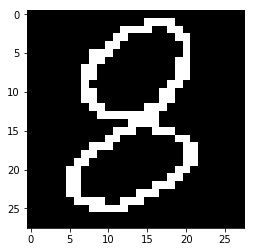

In [66]:
img = load_img("../datasets/nums/eight.jpeg", target_size=(28, 28), grayscale=True)
type(img)
plane = (np.array(img) < 100).astype(int) * 255
plt.imshow(plane, cmap="gray")
model.predict(np.array([plane.flatten()])).argsort(axis=1)